In [1]:
import numpy as np
import sys,os
sys.path.append('../LLM/')
from time import time
import matplotlib.pyplot as plt
sys.path.append('../../../')
from paths import *
start = time()

#for fancy plotting
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 18
plt.rcParams.update({'figure.autolayout': True})
#colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = plt.style.library['ggplot']['axes.prop_cycle'].by_key()['color']
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)
# print(plt.rcParams.keys())
np.set_printoptions(precision=3)
# markers = ['p','p','o','o','x','x']
markers = ['s']

In [2]:
sub_lengths = np.arange(80,300+1,20,dtype=int)

layer_ids = [0,24]
emb_dim = 1024
Nbits = 1


normalize = 1
normalization = 1.
batch_randomize_flags = [0,1]
N_batches = 20
batch_size = 100
ID_FCI = np.zeros(shape=(len(layer_ids),
                         len(sub_lengths),
                         len(batch_randomize_flags))
)

for batch_r_id,batch_randomize in enumerate(batch_randomize_flags):
  for layer_index,layer_id in enumerate(layer_ids):
    for sub_length_id,sub_length in enumerate(sub_lengths):
      resultsfolder = makefolder(base=f'results/FCI/',
                            #  precision=2,
                            batch_randomize=batch_randomize,
                            Ns=N_batches*batch_size,
                            layer_id=layer_id,
                            sub_length=sub_length,
                            )
      d,x0,err = np.loadtxt(resultsfolder + 'FCI_fit.txt',unpack=True)
      ID_FCI[layer_index,sub_length_id,batch_r_id] = d 
ID_FCI[np.where(ID_FCI > 20000)] = None # code crashes....


if normalize:
  for batch_r_id,batch_randomize in enumerate(batch_randomize_flags):
    for layer_index,layer_id in enumerate(layer_ids):
      for sub_length_id,sub_length in enumerate(sub_lengths):
        normalization = sub_length*emb_dim
        ID_FCI[layer_index,sub_length_id,batch_r_id] /= normalization

In [3]:
p,cov = np.polyfit(np.log(sub_lengths),np.log(ID_FCI[-1,:,0]),deg=1,cov=True)
print(f'{p=}')
print(f'{cov=}')

p=array([-0.879,  0.452])
cov=array([[ 3.378e-05, -1.719e-04],
       [-1.719e-04,  8.826e-04]])


[]

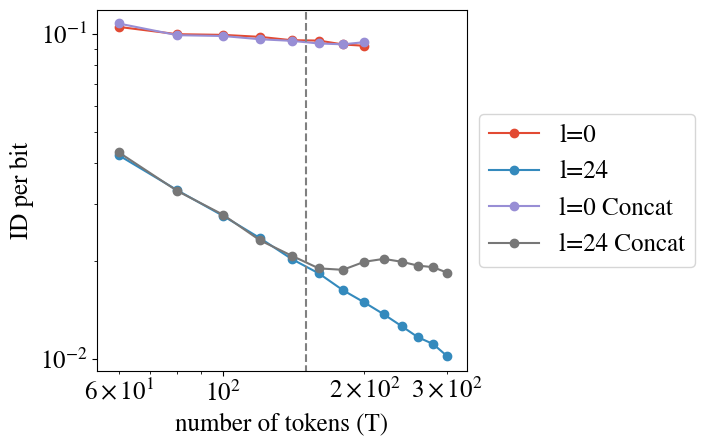

In [4]:
fig = plt.figure()
ax = fig.add_subplot()

for batch_r_id,batch_randomize in enumerate(batch_randomize_flags):
  for layer_index,layer_id in enumerate(layer_ids):
    lbl = f"l={layer_id}"
    if batch_randomize:
      lbl += ' Concat'
    ax.plot(sub_lengths,
            ID_FCI[layer_index,:,batch_r_id], 
            label=lbl,
            marker='o',
            )

# ax.legend(loc='upper left')
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel('number of tokens (T)')

if normalize:
  ylabel = 'ID per bit'
else:
  ylabel = 'ID'
ax.set_ylabel(ylabel)
ax.vlines(150,
          ax.get_ylim()[0],
          ax.get_ylim()[1],
          linestyles='dashed',
          color='gray')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlim(np.nanmin(sub_lengths)*.9,
            np.nanmax(sub_lengths)*1.1)
ax.set_ylim(np.nanmin(ID_FCI)*.9,
            np.nanmax(ID_FCI)*1.1)

plt.tight_layout()
plt.plot()

In [95]:
fig.savefig()

1024

In [77]:
# from dadapy.hamming import *
# corpus = 'Wikitext'
# LLM = 'Pythia'
# batch_randomize = 0
# Lconcat = 150
# randomize = 0

# optfolder0 = f'../LLM/results/{corpus}/{LLM}/opt/'
# if randomize:
#   optfolder0 += f'randomize/'
# if Ntokens != 0:
#   optfolder0 += f'Ntokens{Ntokens}/'
# if batch_randomize:
#   optfolder0 += f'Lconcat{Lconcat}/'
# if Nbits > 1:
#   optfolder0 += f'Nbits{Nbits}/'


# figsfolder = f'results/{corpus}/{LLM}/figs/length_dependence/Nbits{Nbits}/'
# if batch_randomize:
#   figsfolder += f'Lconcat{Lconcat}/'
# os.makedirs(figsfolder,exist_ok=True)


# eps = 1E-7
# log_scale = 0
# alphamax_list = np.array([.7])
# alphamin = 1E-5
# seed = 111
# delta = 7E-4
# Nsteps = int(5E6)

# layer_ids = [24]
# for layer_id in layer_ids:
#   print(f'{layer_id=}')
#   if layer_id == 24 and LLM == 'OPT':
#     emb_dim = 512
#   else:
#     emb_dim = 1024
#   sub_lengths_BID = np.array([i * 10  for i in range(8,30+1,2)])
#   N_list = (sub_lengths_BID) * emb_dim * Nbits
#   fig,(axs,axa,axKL,axr) = plt.subplots(nrows=4,
#                                         ncols=1,
#                                         figsize=(10,10)
#                           )

#   sigmas = np.empty(shape=(len(sub_lengths_BID),
#                           len(alphamax_list)
#                           )
#                     )
#   alphas = np.empty(shape=sigmas.shape)
#   logKLs = np.empty(shape=sigmas.shape)
#   rmaxs = np.empty(shape=sigmas.shape)

#   for alphamax_id,alphamax in enumerate(alphamax_list):
#     print(f'{alphamax=:.5f}')
#     for sub_length_id,sub_length in enumerate(sub_lengths_BID): 
#       B = BID(
#             alphamin=alphamin,
#             alphamax=alphamax,
#             seed=seed,
#             delta=delta,
#             Nsteps=Nsteps,
#             optfolder0=optfolder0+f'sublength{sub_length}/layer_id{layer_id}/',
#             )
#       (rmaxs[sub_length_id,alphamax_id],
#       sigmas[sub_length_id,alphamax_id],
#       alphas[sub_length_id,alphamax_id],
#       logKLs[sub_length_id,alphamax_id]) = B.load_results()
#     # output_filename = optfolder0 + f'length_dependence_l_id{layer_id}_alphamax{alphamax:.5f}_alphamin{alphamin:.5f}.txt'
#     # np.savetxt(fname=output_filename,
#     #           X=np.transpose([sub_lengths_BID,
#     #                           sigmas[:,alphamax_id]/N_list,
#     #                           alphas[:,alphamax_id],
#     #                           logKLs[:,alphamax_id],
#     #                           rmaxs[:,alphamax_id]/N_list]
#     #                           )
#     #             )
    
#   for aux, alphamax_id in enumerate(range(len(alphamax_list))):
#     alphamax = alphamax_list[alphamax_id]
#     axs.plot(sub_lengths_BID,sigmas[:,alphamax_id]/N_list,'s-',color=colors[aux%len(colors)],label=f'a={alphamax:.5f}')
#     axa.plot(sub_lengths_BID,alphas[:,alphamax_id],'s-',color=colors[aux%len(colors)],label=f'a={alphamax:.5f}')
#     axKL.plot(sub_lengths_BID,logKLs[:,alphamax_id],'s-',color=colors[aux%len(colors)],label=f'a={alphamax:.5f}')
#     axr.plot(sub_lengths_BID,rmaxs[:,alphamax_id]/N_list,'s-',color=colors[aux%len(colors)],label=f'a={alphamax:.5f}')
#   axs.set_ylabel(r'BID/N')
#   axa.set_ylabel(r'$\alpha$')
#   axKL.set_ylabel(r'$\log{KL}$')
#   axr.set_ylabel(r'$r*/N$')
#   axr.set_xlabel('number of tokens (T)')
#   # axr.set_xlabel(r'$N_{tokens}$')

#   title = f'{corpus} layer{layer_id}'
#   axs.set_title(title)
#   box = axs.get_position()
#   axs.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#   axs.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#   # fig.savefig(figsfolder + f'length_dependence_rand{randomize}_l_id{layer_id}_alphamin{alphamin:.5f}.pdf',
#   #             bbox_inches='tight')

        

        